In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import pandas as pd

In [2]:
from fastai.text import *

In [3]:
import html
import json

In [4]:
bs = 32 # cuda out of mem with 2% of dataset and bs = 64!

In [5]:
path = Path('/home/jupyter/NLP/Hollywood_Script_Generator/language_model_wiki/LM_de/')

In [6]:
import fastai
print(fastai.__version__)

1.0.51


### Prepare Data

In [17]:
data = Path('/home/jupyter/NLP/Hollywood_Script_Generator/language_model_wiki/LM_de/')

In [18]:
data.ls()

[PosixPath('/home/jupyter/NLP/Hollywood_Script_Generator/language_model_wiki/LM_de/train'),
 PosixPath('/home/jupyter/NLP/Hollywood_Script_Generator/language_model_wiki/LM_de/data_de-10pct.pkl'),
 PosixPath('/home/jupyter/NLP/Hollywood_Script_Generator/language_model_wiki/LM_de/models'),
 PosixPath('/home/jupyter/NLP/Hollywood_Script_Generator/language_model_wiki/LM_de/data_de-20pct.pkl'),
 PosixPath('/home/jupyter/NLP/Hollywood_Script_Generator/language_model_wiki/LM_de/valid'),
 PosixPath('/home/jupyter/NLP/Hollywood_Script_Generator/language_model_wiki/LM_de/data_de-6pct.pkl'),
 PosixPath('/home/jupyter/NLP/Hollywood_Script_Generator/language_model_wiki/LM_de/.ipynb_checkpoints')]

In [9]:
# run this - otherwise the following error may occur while dataloading: 
# "_csv.Error: field larger than field limit (131072)"
# solution taken from: https://stackoverflow.com/a/15063941/5983691
def csv_field_limit():
    maxInt = sys.maxsize
    decrement = True

    while decrement:
        # decrease the maxInt value by factor 10
        # as long as the OverflowError occurs.
        decrement = False
        try:
            csv.field_size_limit(maxInt)
        except OverflowError:
            maxInt = int(maxInt/10)
            decrement = True

In [10]:
csv_field_limit()

In [11]:
df_train = pd.read_csv(data/'train_de.csv', index_col=False, error_bad_lines=False, header=None, engine="python") 

In [12]:
df_val = pd.read_csv(data/'val_de.csv', index_col=False, error_bad_lines=False, header=None, engine="python")

In [13]:
len(df_train)

1092644

In [15]:
len(df_val)

273161

In [19]:
df_val.tail()

,0
273156,Geoffrey Arthur Romaine Callender (* 25. Novem...
273157,"Der Brumbach, auch Brombach, ist ein orographi..."
273158,Ursula Kamizuru geb. Hirschmüller (* 7. Novemb...
273159,Alvin Morell Bentley (* 30. August 1918 in Por...
273160,Barry Sullivan (* 29. August 1912 in New York ...


In [20]:
df_train = df_train[0:(int(len(df_train)*.1))] # we take just 10% of the Wikipedia training data set(RAM memory issue)

In [22]:
df_val = df_val[0:(int(len(df_val)*.1))] # we take just 10% of the validation data set

In [24]:
df_train.head()

,0
0,Gifhorn ist die Kreisstadt des gleichnamigen L...
1,Eduard Wagner (* 1. April 1894 Kirchenlamitz; ...
2,what3words ist ein System zur Georeferenzierun...
3,Das Gräflich Schönborn’sche Schloss Gaibach is...
4,"Die Bärtige Archenmuschel (""Barbatia barbata"")..."


In [25]:
# let's remove the "Section" heads
def delete_section_head(item):
    output = item.replace('Section::::', '')
    return output

In [26]:
df_val[0] = [delete_section_head(item) for item in df_val[0]]

In [27]:
df_train[0] = [delete_section_head(item) for item in df_train[0]]

In [28]:
df_val[0][1000] # example item

'Rudolf Schubert (* 2. Oktober 1866 in Waldheim; † 9. März 1954 in Dresden) war ein deutscher Pädagoge und Hochschullehrer.\n\nLeben.\nDer aus der Kleinstadt Waldheim an der Zschopau stammende Rudolf Schubert studierte seit 1880 am Lehrerseminar in Annaberg im Erzgebirge. Nach seinem Abschluss war Schubert seit 1886 als Volksschullehrer in Annaberg, seit 1887 in selber Funktion in Leipzig angestellt. 1890 nahm Rudolf Schubert das Studium der Pädagogik und Geschichte an der Universität Leipzig auf, dort erfolgte 1898 seine Promotion zum Dr. phil.\n\nSchubert übernahm 1896 eine Lehrerstelle an der Schule für Frauenberufe in Leipzig, 1907 wechselte er in der Position eines Gewerbelehrers zu den Technischen Lehranstalten der Stadt Leipzig. Der 1921 zum Gewerbeschulrat Beförderte fungierte später als Gewerbeoberschulrat in Dresden. 1925 erhielt Rudolf Schubert eine Honorarprofessur für Berufspädagogik und Geschichte des Berufsschulwesens an der Technischen Hochschule Dresden, die er bis 193

In [ ]:
data_train = TextLMDataBunch.from_df(path, train_df=df_train, valid_df=df_val, text_cols = 0, bs=bs) 

Cristian Duguet suggests trying hyperparams as found by Kaspar Lund: https://forums.fast.ai/t/training-transformerxl/40104/12

### Train the Language Model

In [9]:
lr_recommended = 5e-4
pct_start_recommended = 2e-2
moms_recommended = (0.75,0.825)
wd_recommended = 1e-5
drop_recommended = 0.05

In [ ]:
data_lm.save('/home/jupyter/NLP/Hollywood_Script_Generator/language_model_wiki/LM_de/data_de-10pct.pkl')

In [10]:
data_lm = load_data(path, 'data_de-10pct.pkl', bs=bs)

In [21]:
config = tfmerXL_lm_config.copy()
config['mem_len'] = 50 # instead of 150

In [22]:
learn = language_model_learner(data_lm, TransformerXL, config = config, drop_mult=drop_recommended, pretrained=False)

In [ ]:
learn.lr_find()

In [ ]:
learn.recorder.plot()

In [ ]:
lr=3e-3

In [23]:
learn.fit_one_cycle(cyc_len=1,
                    max_lr=lr_recommended,
                    moms=moms_recommended,
                    wd=wd_recommended)

epoch,train_loss,valid_loss,accuracy,time
0,3.075272,3.109456,0.463295,2:37:13


In [ ]:
learn.save('tXL_1_DE_10pct_mem50')

In [46]:
TEXT = "Katharine Hepburn erschrak. Dann nahm sie das Gewehr." 
N_WORDS = 1000
N_SENTENCES = 1

In [ ]:
candidate = "\n".join(learn.predict(TEXT, N_WORDS, temperature=0.85) for _ in range(N_SENTENCES))
print(candidate)

In [ ]:
learn.lr_find()

In [ ]:
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(cyc_len=3,
                    max_lr=2e-4,
                    moms=moms_recommended,
                    wd=wd_recommended)

epoch,train_loss,valid_loss,accuracy,time
0,3.098159,3.111331,0.461736,2:37:47


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

IOPub message rate exceed

In [ ]:
learn.save('tXL_4_DE_10pct_mem50') # 2nd and 3rd epoch weren't displayed, but results were saved

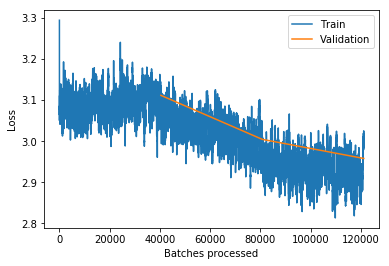

In [29]:
learn.recorder.plot_losses()

In [31]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


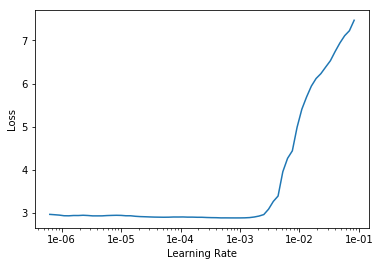

In [32]:
learn.recorder.plot()

In [37]:
learn.fit_one_cycle(cyc_len=5,
                    max_lr=2e-5,
                    moms=moms_recommended,
                    wd=wd_recommended)

epoch,train_loss,valid_loss,accuracy,time
0,2.919116,2.958779,0.483416,2:38:50
1,2.876537,2.955797,0.484179,2:38:57
2,2.905848,2.946005,0.485434,2:38:59
3,2.900809,2.941427,0.486063,2:39:01
4,2.867813,2.940352,0.486203,2:39:00


In [38]:
learn.save('tXL_9_DE_10pct_mem50')

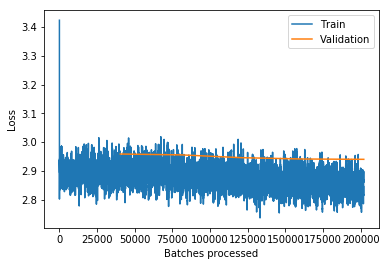

In [39]:
learn.recorder.plot_losses()

In [48]:
# preplexity of best validation loss:
import math
math.exp(2.940352) 

18.922505862168972